<a href="https://colab.research.google.com/github/IsadoraPrevitalle/TCC-Eficiencia_RedesNeurais_PrevisaoSeriesFinanceiras/blob/main/analise_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dados = pd.read_csv('./sample_data/california_housing_train.csv')

In [ ]:
dados.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
dados.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
!pip install sweetviz
import sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 68.3 MB/s eta 0:00:00


In [ ]:
analise = sweetviz.analyze(dados)
analise.show_html()

/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<ipython-input-10-f9a39e24bb9a>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(dados.corr(), dtype=np.bool))


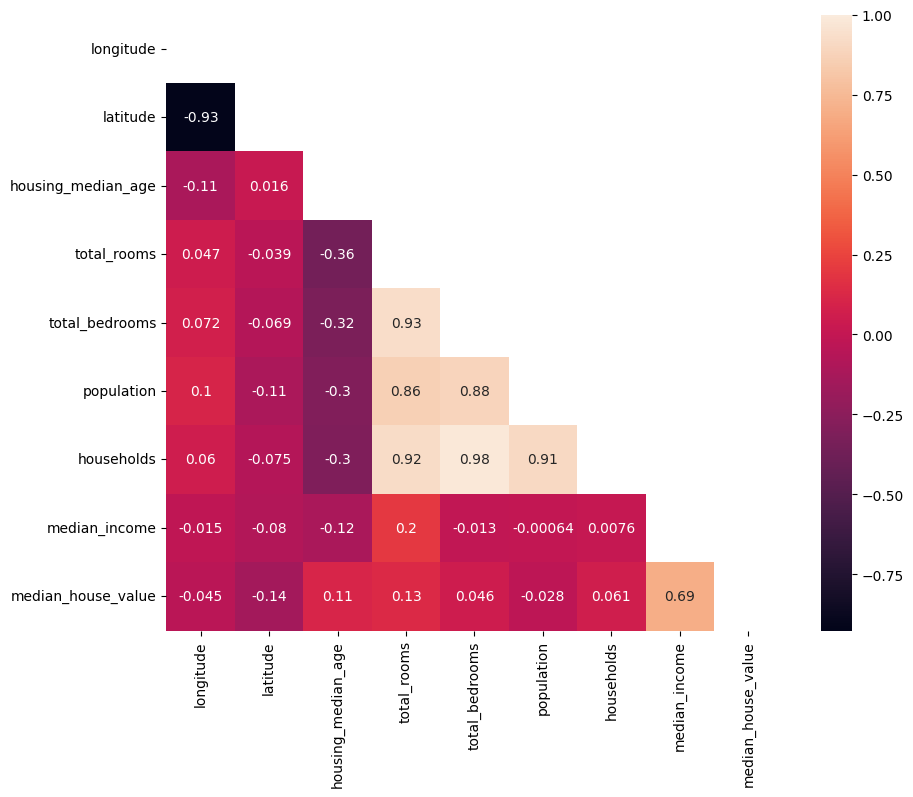

In [ ]:
mask = np.triu(np.ones_like(dados.corr(), dtype=np.bool))
plt.figure(figsize=(10,8))
sns.heatmap(dados.corr(),mask=mask, square = True, annot = True, vmax=1)
plt.show()

In [ ]:
y=dados.median_house_value
y

0         66900.0
1         80100.0
2         85700.0
3         73400.0
4         65500.0
           ...   
16995    111400.0
16996     79000.0
16997    103600.0
16998     85800.0
16999     94600.0
Name: median_house_value, Length: 17000, dtype: float64

In [ ]:
features=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']

In [ ]:
X = dados[features]
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250
...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
modelo = KNeighborsRegressor(2)

In [ ]:
modelo.fit(X,y)

KNeighborsRegressor(n_neighbors=2)

In [ ]:
dados.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


In [ ]:
modelo.predict(X.head(10))

array([ 89200., 108650.,  86850.,  87150.,  59400., 104750.,  77900.,
        61000., 125100.,  75800.])

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
predicao = modelo.predict(X)

In [ ]:
mean_absolute_error(y,predicao)

47199.18423529412

In [ ]:
d2 = pd.DataFrame(y)
d2['pred']=predicao
d2.sample(10)

,median_house_value,pred
4055,190700.0,186400.0
850,154900.0,136350.0
2837,117800.0,123100.0
15189,417500.0,458750.5
10521,315000.0,202250.0
12467,89500.0,97350.0
8562,222100.0,237250.0
11734,101600.0,94700.0
11636,204500.0,174250.0
6696,187500.0,182350.0


In [ ]:
d2.describe()

,median_house_value,pred
count,17000.000000,17000.000000
mean,207300.912353,207622.169882
std,115983.764387,96680.694026
min,14999.000000,33149.500000
25%,119400.000000,137337.500000
50%,180400.000000,185000.000000
75%,265000.000000,258250.000000
max,500001.000000,500001.000000


In [ ]:
#Outro modelo
from sklearn.model_selection import train_test_split

In [ ]:
treino_X, val_X, treino_y, val_y, = train_test_split(X,y, random_state=1,train_size=0.9)

In [ ]:
treino_X.shape

(15300, 8)

In [ ]:
mod2 = KNeighborsRegressor(2)

In [ ]:
mod2.fit(treino_X, treino_y)

KNeighborsRegressor(n_neighbors=2)

In [ ]:
pred2 = mod2.predict(val_X)

In [ ]:
mean_absolute_error(val_y,pred2)

82657.99147058824

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
MT = DecisionTreeRegressor(random_state=1, min_samples_leaf=5)

In [ ]:
MT.fit(X,y)

DecisionTreeRegressor(min_samples_leaf=5, random_state=1)

In [ ]:
pred=MT.predict(X)

In [ ]:
mean_absolute_error(y,pred)

21679.80389215686

In [ ]:
MT.fit(treino_X,treino_y)

DecisionTreeRegressor(min_samples_leaf=5, random_state=1)

In [ ]:
pred=MT.predict(val_X)

In [ ]:
mean_absolute_error(val_y,pred)

40081.31150396826

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
mod = RandomForestRegressor(random_state=1,n_jobs=1,n_estimators=200)

In [ ]:
mod.fit(treino_X,treino_y)

RandomForestRegressor(n_estimators=200, n_jobs=1, random_state=1)

In [ ]:
pred=mod.predict(val_X)

In [ ]:
mean_absolute_error(val_y,pred)

30545.737782352942